In [1]:
# This code is a EDA of the kaggle competition: 
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# set ipython notebook display
pd.set_option('display.max_columns',60)

In [3]:
# load data
path = ""
aisles = pd.read_csv(path+"aisles.csv")
products = pd.read_csv(path+"products.csv")
departments = pd.read_csv(path+"departments.csv")
orders = pd.read_csv(path+"orders.csv")
dtrain = pd.read_csv(path+"order_products__train.csv")
dprior = pd.read_csv(path+"order_products__prior.csv")#, nrows=1000000)
sample_submission = pd.read_csv(path + "sample_submission.csv")

In [4]:
# check data size
print "ailes = (%10d,%3d)\t"%aisles.shape, aisles.columns
print "\nproducts = (%10d,%3d)\t"%products.shape, products.columns
print "\ndepartments = (%10d,%3d)\t"%departments.shape,departments.columns
print "\norders = ",orders.shape, "\t\t", orders.columns
print "\ndtrain = ",dtrain.shape, "\t\t", dtrain.columns
print "\ndprior",dprior.shape, "\t\t", dprior.columns

ailes = (       134,  2)	Index([u'aisle_id', u'aisle'], dtype='object')

products = (     49688,  4)	Index([u'product_id', u'product_name', u'aisle_id', u'department_id'], dtype='object')

departments = (        21,  2)	Index([u'department_id', u'department'], dtype='object')

orders =  (3421083, 7) 		Index([u'order_id', u'user_id', u'eval_set', u'order_number', u'order_dow',
       u'order_hour_of_day', u'days_since_prior_order'],
      dtype='object')

dtrain =  (1384617, 4) 		Index([u'order_id', u'product_id', u'add_to_cart_order', u'reordered'], dtype='object')

dprior (32434489, 4) 		Index([u'order_id', u'product_id', u'add_to_cart_order', u'reordered'], dtype='object')


In [10]:
# join data files together
prior_details = dprior.merge(products,how="left",on="product_id").merge(departments,how="left",on="department_id").merge(aisles, how="left",on="aisle_id")
prior_details.head()

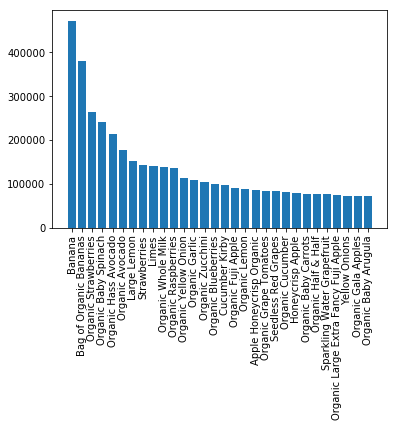

In [39]:
# plot the most ordered products
# interestingly, the top ordered products are organic and fruits.
_prod_stats = prior_details['product_name'].value_counts().reset_index().head(30)
_prod_stats.columns = ['product_name', 'freq']
x = _prod_stats.product_name.tolist()
y = _prod_stats.freq.tolist()

plt.figure(1)
_x = range(30)
plt.xticks(_x, x, rotation='vertical')
plt.bar(_x, y)
plt.show()

In [13]:
# check the most reordered products
_prod_stats = prior_details[prior_details.reordered == 1]['product_name'].value_counts().reset_index().head(20)
_prod_stats

,product_name,frequency_count
0,Banana,398609
1,Bag of Organic Bananas,315913
2,Organic Strawberries,205845
3,Organic Baby Spinach,186884
4,Organic Hass Avocado,170131
5,Organic Avocado,134044
6,Organic Whole Milk,114510
7,Large Lemon,106255
8,Organic Raspberries,105409
9,Strawberries,99802
